# Supermarket Sales Exploratory Data Analysis

<img src="https://github.com/AvaWhitney/supermarket-sales-analysis/blob/main/media/supermarket_image_2.jpeg?raw=true">

## Introduction
This exploratory data analysis investigates a supermarket sales dataset collected over a three-month period across three branches. Each transaction includes information such as product category, payment method, customer type, purchase time, and customer rating. The goal of this analysis is to uncover insights into customer behavior, branch performance, and sales trends over time, with a special focus on understanding how these variables interact across locations.

This project not only visualizes transaction patterns but also incorporates statistical summaries and hypothesis testing to provide evidence-backed conclusions. Findings are structured to highlight both overall trends and branch-level distinctions that may inform operational or marketing strategies.

### Objectives
1. **Branch Performance**  
   * Compare total and average sales across branches
   * Identify differences in product popularity, customer demographics, and customer satisfaction between locations
2. **Customer Behavior**
   * Analyze the influence of gender and membership status on product preference, payment method, and transaction value
   * Explore how ratings vary by product type and branch
4. **Temporal Trends**  
   * Uncover patterns in shopping behavior by day of the week and time of day
   * Identify peak and off-peak hours per branch, and determine how timing influences sales volume

### Data Dictionary

- **Invoice id:** Computer generated sales slip invoice identification number.
  
- **Branch:** Branch of supercenter (3 branches are available identified by A, B and C).

- **City:** Location of supercenters.

- **Customer type:** Type of customers, recorded by Members for customers using member card and Normal for without member card.

- **Gender:** Gender type of customer

- **Product line:** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

- **Unit price:** Price of each product in USD

- **Quantity:** Number of products purchased by customer

- **Tax:** 5% tax fee for customer buying

- **Total:** Total price including tax

- **Date:** Date of purchase (Record available from January 2019 to March 2019)

- **Time:** Purchase time (10am to 9pm)

- **Payment:** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- **COGS:** Cost of goods sold

- **Gross margin percentage:** Gross margin percentage

- **Gross income:** Gross income

- **Rating:** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)



## Import Libraries

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

##  Data Overview

We begin by loading the dataset and examining its structure to get an initial understanding of the variables. This includes checking for missing values, duplicates, and data types before proceeding with cleaning and transformation.


In [348]:
df = pd.read_csv("./datasets/supermarket_sales.csv")

display(df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Data Inspection and Cleaning

Before diving into the analysis, we perform essential cleaning steps:
* Check for missing or duplicate values
* Convert relevant columns into appropriate datetime formats
* Create new time-based features like `Hour` and `Day of Week` for temporal analysis

In [350]:
# Checking for missing or empty values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [351]:
# Checking for duplicates
df.duplicated().sum()

0

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [353]:
# Converting Date and Time to datetime format and extracting Hour and Day of Week columns
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M").dt.time
df['Hour'] = pd.to_datetime(df['Time'], format="%H:%M:%S").dt.hour
df['Day of Week'] = df['Date'].dt.day_name()

In [354]:
#df.to_csv("supermarket_sales_clean.csv", index=False)

## Exploratory Data Analysis

In this section, we analyze and visualize the dataset to uncover meaningful patterns, trends, and relationships. The EDA is divided into two main parts: Univariate Analysis, which focuses on individual variables, and Bivariate Analysis, which explores interactions between two variables.

### Univariate Analysis

#### Goals:

* Examine the distribution, central tendency, and variability of key numerical features.
* Identify outliers, skewed distributions, and common ranges for transaction values, product prices, and ratings.
* Analyze the frequency of categorical variables such as product lines, payment methods, gender, and customer type to understand overall customer preferences and operational patterns.

In [358]:
# Getting summary statistics for numerical columns
numerical_cols = ["Total", "Quantity", "Unit price", "gross income", "Rating"]
summary_stats = df[numerical_cols].describe()
display(summary_stats)

,Total,Quantity,Unit price,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,322.966749,5.510000,55.672130,15.379369,6.97270
std,245.885335,2.923431,26.494628,11.708825,1.71858
min,10.678500,1.000000,10.080000,0.508500,4.00000
25%,124.422375,3.000000,32.875000,5.924875,5.50000
50%,253.848000,5.000000,55.230000,12.088000,7.00000
75%,471.350250,8.000000,77.935000,22.445250,8.50000
max,1042.650000,10.000000,99.960000,49.650000,10.00000


####  Distribution of Numerical Features

We start by exploring the distribution of key numerical variables. These histograms will help us identify skewness, outliers, and common transaction ranges.

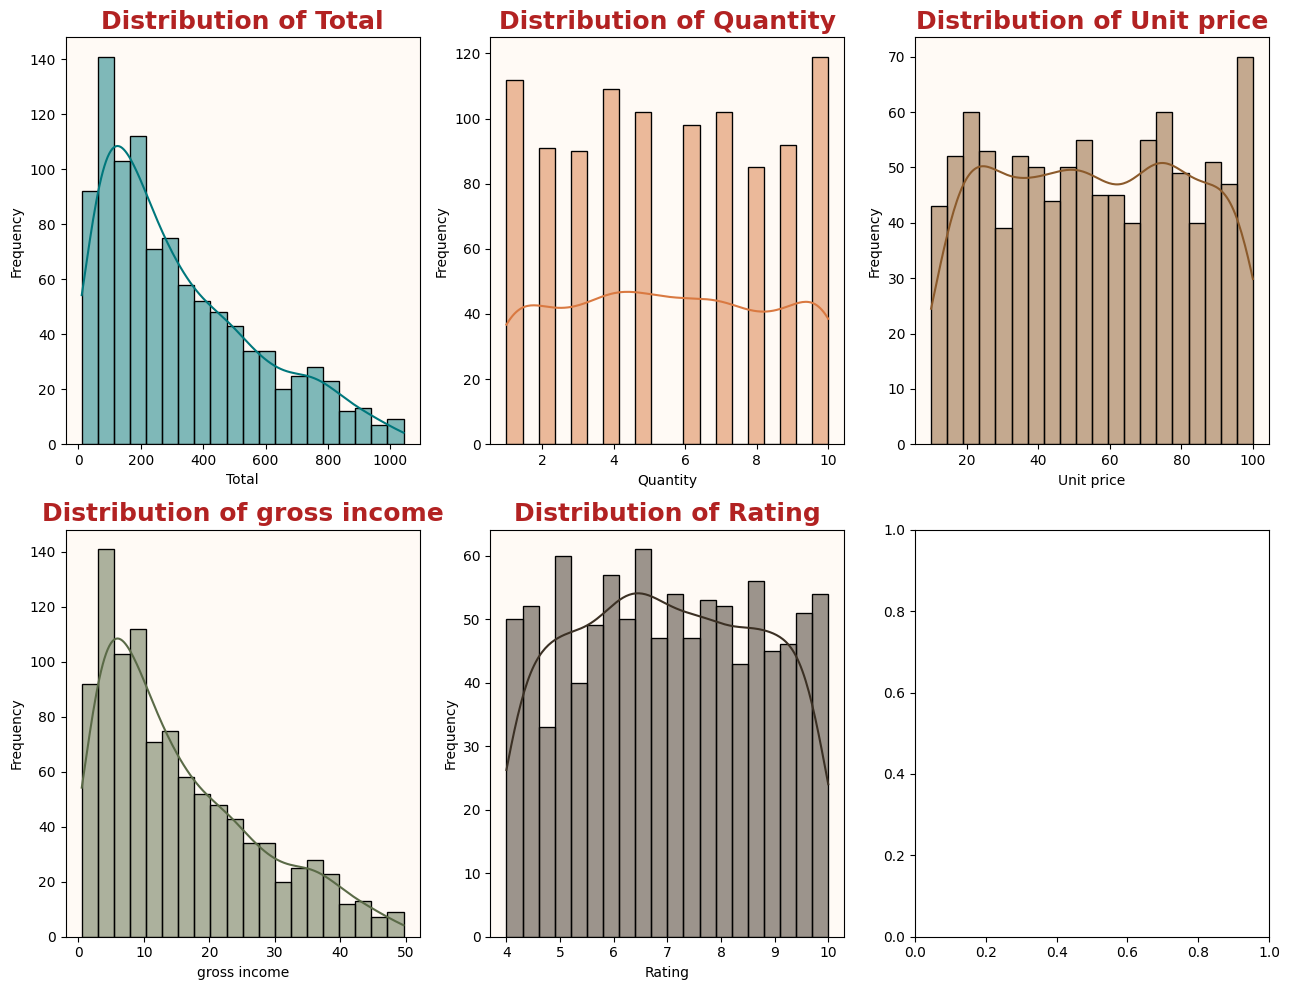

In [360]:
colors = ["#00777C", "#D97941", "#8B5A2B", "#5A6A47", "#3B3024", "#E3AE56"]
fig, axes = plt.subplots(2, 3, figsize=(13,10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=18, color="#B22222", fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_facecolor("#FFFAF5")

plt.tight_layout()
plt.show()

#### Boxplots of Numerical Features

We'll create boxplots to provide a deeper look at spread, outliers, and quartile ranges. This is especially useful for comparing transaction value, pricing, and customer ratings.

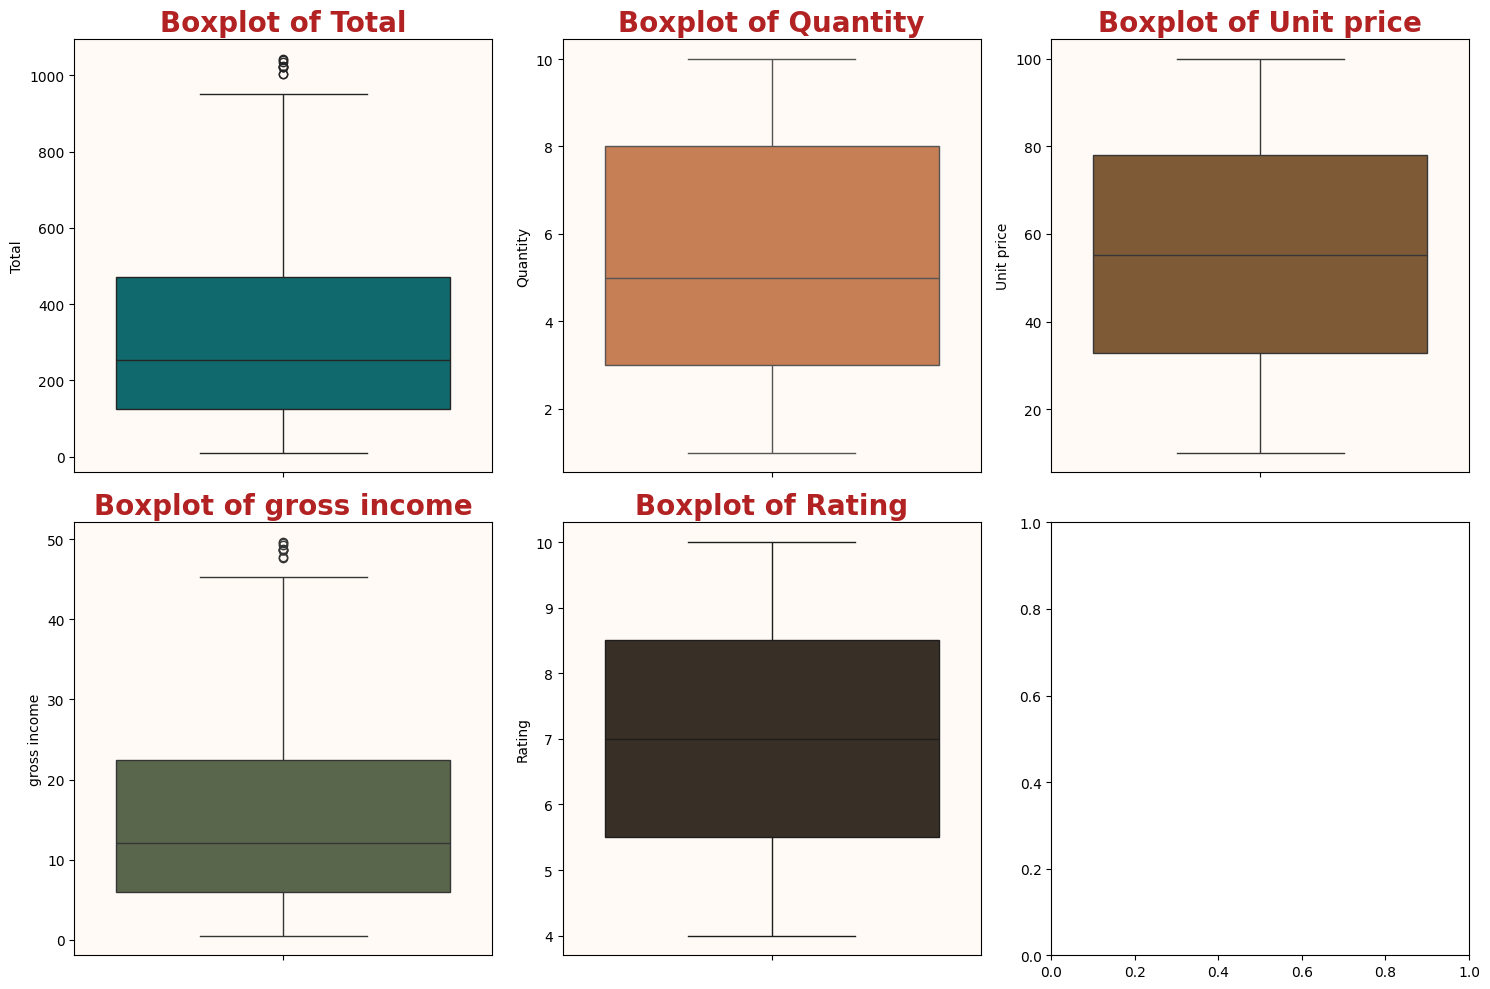

In [362]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color=colors[i], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=20, color="#B22222", fontweight="bold")
    axes[i].set_ylabel(col)
    axes[i].set_facecolor("#FFFAF5")

plt.tight_layout()
plt.show()

#### Categorical Feature Distribution

Next, we examine the frequency of key categorical variables, such as gender, customer type, product line, and payment method, to understand customer preferences and behavior.


In [364]:
# Overall Gender Distribution
overall_gender = df["Gender"].value_counts(normalize=True).round(3) * 100

print('Overall Gender Percentages')
display(overall_gender)

Overall Gender Percentages


Gender
Female    50.1
Male      49.9
Name: proportion, dtype: float64

In [365]:
# Overall distributionof customer type
overall_customer_type = df["Customer type"].value_counts(normalize=True).round(3) * 100

print('Customer Type Percentages')
display(overall_customer_type)

Customer Type Percentages


Customer type
Member    50.1
Normal    49.9
Name: proportion, dtype: float64

In [366]:
# Overall product line popularity
overall_product_percent = df["Product line"].value_counts(normalize=True).round(3) * 100

print('Percentage of transactions per product line')
display(overall_product_percent)

Percentage of transactions per product line


Product line
Fashion accessories       17.8
Food and beverages        17.4
Electronic accessories    17.0
Sports and travel         16.6
Home and lifestyle        16.0
Health and beauty         15.2
Name: proportion, dtype: float64

In [367]:
# Payment methods used
overall_payment_pct = df["Payment"].value_counts(normalize=True).round(3) * 100

print('Percentages of payment methods used')
display(overall_payment_pct)

Percentages of payment methods used


Payment
Ewallet        34.5
Cash           34.4
Credit card    31.1
Name: proportion, dtype: float64

---

### Key Insights

Here are some immediate takeaways from the univariate analysis:

* Most transactions have low to moderate total sales, with only a few high-value transactions.
* Gross income likely correlates with total sales with most transactions generating low gross income.
* Customer ratings are well spread out, meaning customers have varied experiences.
* Unit Prices show a bimodal distribution.
* Gender distribution is well balanced across all branches, with 50.1% female and 49.9% male shoppers.
* The customer base is evenly split between Members (50.1%) and Normal customers (49.9%).
* Fashion accessories, food and beverages, and electronics are the most popular product lines overall.
* Payment methods are almost evenly split overall.

---

### Bivariate Analysis

#### Goals: 
* Compare branch performance across multiple metrics including sales, product line popularity, and customer ratings.
* Investigate customer behavior patterns by comparing preferences across gender, membership status, and payment method.
* Analyze sales trends over time, identifying peak shopping hours and days for each branch, and exploring how timing correlates with product categories and total purchase amounts.



#### Overall Sales Trends Over the Week

Which days see the most revenue? We will look at the overall data across all branches.


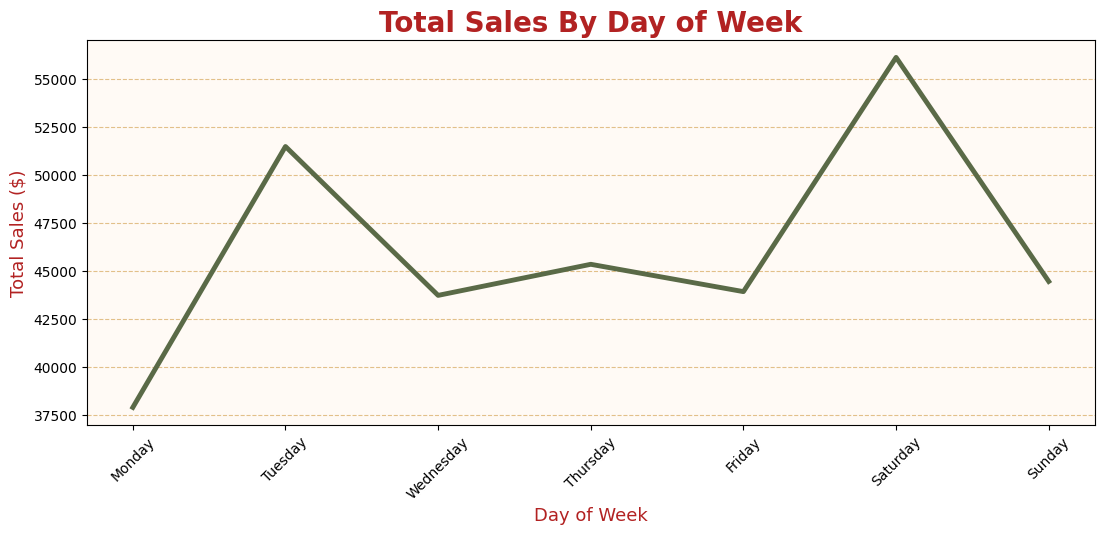

In [371]:
# Plotting total sales per day to see how revenue fluctuates
sales_trend = df.groupby("Day of Week")["Total"].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(13,5))
sns.lineplot(x=sales_trend.index, y=sales_trend.values, color="#5A6A47", linewidth=3.5)
plt.title("Total Sales By Day of Week", fontsize=20, fontweight="bold", color="#B22222")
plt.xlabel("Day of Week", fontsize=13, color="#B22222")
plt.ylabel("Total Sales ($)", fontsize=13, color="#B22222")
plt.xticks(rotation=45)
plt.gca().set_facecolor("#FFFAF5")
plt.grid(color="#D6A85C", axis="y", linestyle="--", alpha=0.7)
plt.show()

In [372]:
# Total sales per day of week (overall)
sales_by_day = df["Day of Week"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
sales_by_day_pct = (sales_by_day / sales_by_day.sum() * 100).round(2)

# Total sales per hour (overall)
sales_by_hour = df["Hour"].value_counts().sort_index()
sales_by_hour_pct = (sales_by_hour / sales_by_hour.sum() * 100).round(2)

print('Percentages of Total Sales per Day of Week')
display(sales_by_day_pct)
print('\n\nPercentages of Total Sales per Hour')
display(sales_by_hour_pct)

Percentages of Total Sales per Day of Week


Day of Week
Monday       12.5
Tuesday      15.8
Wednesday    14.3
Thursday     13.8
Friday       13.9
Saturday     16.4
Sunday       13.3
Name: count, dtype: float64



Percentages of Total Sales per Hour


Hour
10    10.1
11     9.0
12     8.9
13    10.3
14     8.3
15    10.2
16     7.7
17     7.4
18     9.3
19    11.3
20     7.5
Name: count, dtype: float64

#### Sales Trends Over the Week by Branch

Now, we will break down the data by branch.


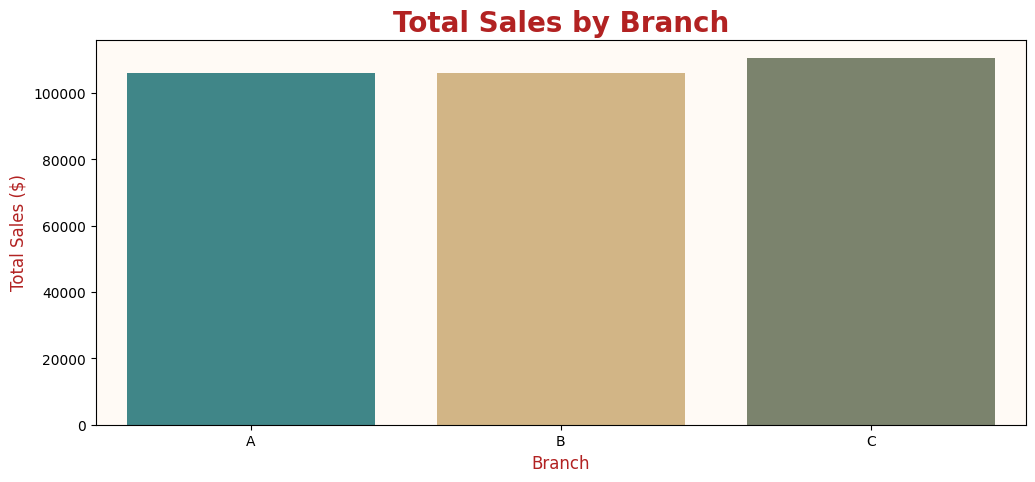

In [374]:
# Analyzing total sales separated by branch
branch_sales = df.groupby("Branch", observed=False)["Total"].sum()

plt.figure(figsize=(12, 5))
sns.barplot(x=branch_sales.index, y=branch_sales.values, hue=branch_sales.index, palette=["#00777C", "#D6A85C", "#5A6A47"], alpha=0.8)
plt.title("Total Sales by Branch", fontsize=20, fontweight="bold", color="#B22222")
plt.xlabel("Branch", fontsize=12, color="#B22222")
plt.ylabel("Total Sales ($)", fontsize=12, color="#B22222")
plt.gca().set_facecolor("#FFFAF5")
plt.show()


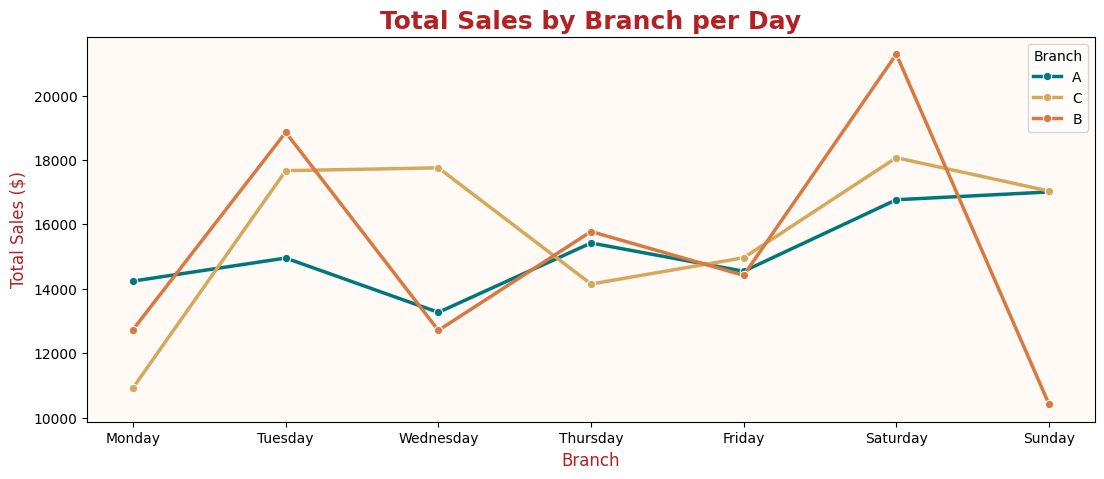

In [375]:
# Analyzing total sales by branch but breaking it down by day of the week
sales_by_branch = df.groupby(["Branch", "Day of Week"], observed=False)["Total"].sum().reset_index()
# Reindexing the days
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_branch["Day of Week"] = pd.Categorical(sales_by_branch["Day of Week"], categories=order, ordered=True)
sales_by_branch = sales_by_branch.sort_values("Day of Week")


plt.figure(figsize=(13, 5))
sns.lineplot(data=sales_by_branch, x="Day of Week", y="Total", hue="Branch", marker='o', linewidth=2.5, palette=["#00777C", "#D6A85C", "#D97941"])
plt.title("Total Sales by Branch per Day", fontsize=18, fontweight="bold", color="#B22222")
plt.xlabel("Branch", fontsize=12, color="#B22222")
plt.ylabel("Total Sales ($)", fontsize=12, color="#B22222")
plt.gca().set_facecolor("#FFFAF5")
plt.legend(title='Branch')
plt.show()

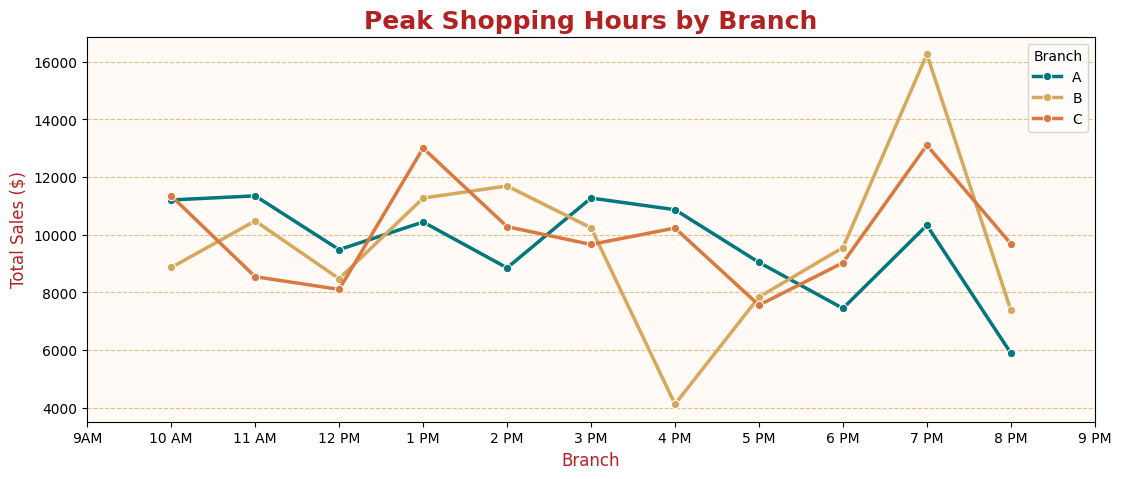

In [376]:
# Analyzing total sales by branch but breaking it down time of day to obtain peak hours
peak_hour_sales = df.groupby(["Branch", "Hour"], observed=False)["Total"].sum().reset_index()

plt.figure(figsize=(13, 5))
sns.lineplot(data=peak_hour_sales, x="Hour", y="Total", hue="Branch", marker='o', linewidth=2.5, palette=["#00777C", "#D6A85C", "#D97941"])
plt.title("Peak Shopping Hours by Branch", fontsize=18, fontweight="bold", color="#B22222")
plt.xlabel("Branch", fontsize=12, color="#B22222")
plt.ylabel("Total Sales ($)", fontsize=12, color="#B22222")
plt.xticks(range(9, 22), labels=[
    "9AM", "10 AM", "11 AM", "12 PM", "1 PM", "2 PM", "3 PM", "4 PM", 
    "5 PM", "6 PM", "7 PM", "8 PM", "9 PM"])
plt.grid(color="#D6A85C", axis="y", linestyle="--", alpha=0.7)
plt.gca().set_facecolor("#FFFAF5")
plt.legend(title='Branch')
plt.show()


Grouping by Branch, Day of Week, and Hour and creating filtered views to see data by day per branch to determine 
peak and slowest times.


In [378]:
full_group = df.groupby(["Branch", "Day of Week", "Hour"], observed=False).size().reset_index(name="Transaction Count")
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
full_group["Day of Week"] = pd.Categorical(full_group["Day of Week"], categories=day_order, ordered=True)

# Merging total transactions per branch
branch_totals = df["Branch"].value_counts()
full_group = full_group.merge(branch_totals.rename("Total"), on="Branch")

# Computing % of branch total for each hour slot and sorting for readability 
full_group["% of Branch Transactions"] = (full_group["Transaction Count"] / full_group["Total"] * 100).round(2)
full_group = full_group.drop(columns=["Transaction Count", "Total"])
full_group = full_group.sort_values(["Branch", "Day of Week", "Hour"])


In [379]:
# Change variables to see data by day per branch
branch_filter = "C"
day_filter = "Saturday"
full_group[(full_group["Branch"] == branch_filter) & (full_group["Day of Week"] == day_filter)].sort_values("Hour")


,Branch,Day of Week,Hour,% of Branch Transactions
173,C,Saturday,10,2.13
174,C,Saturday,11,0.91
175,C,Saturday,12,1.83
176,C,Saturday,13,1.83
177,C,Saturday,14,0.91
178,C,Saturday,15,1.52
179,C,Saturday,16,1.83
180,C,Saturday,17,0.61
181,C,Saturday,18,1.22
182,C,Saturday,19,2.44


#### Gender Distribution by Branch

We will now identify differences in customer gender representation across each store location.


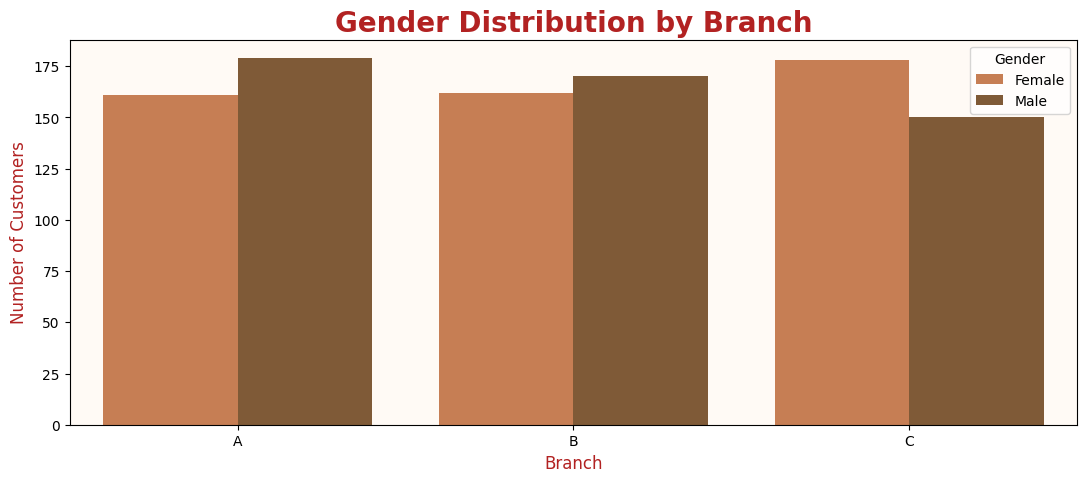

In [381]:
# Analyzing gender distribution by branch
df["Branch"] = pd.Categorical(df["Branch"], categories=["A", "B", "C"], ordered=True)
plt.figure(figsize=(13, 5))
sns.countplot(x="Branch", hue="Gender", data=df, palette=["#D97941", "#8B5A2B"])
plt.title("Gender Distribution by Branch", fontsize=20, fontweight="bold", color="#B22222")
plt.xlabel("Branch", fontsize=12, color="#B22222")
plt.ylabel("Number of Customers", fontsize=12, color="#B22222")
plt.legend(title="Gender", loc="upper right")
plt.gca().set_facecolor("#FFFAF5")
plt.show()


In [382]:
# Gender distribution by branch (percentage)
gender_by_branch = df.groupby("Branch", observed=False)["Gender"].value_counts(normalize=True).unstack().round(3) * 100

print('Gender Percentages by Branch')
display(gender_by_branch)

Gender Percentages by Branch


Gender,Female,Male
Branch,,
A,47.4,52.6
B,48.8,51.2
C,54.3,45.7


#### Product Line Purchases by Hour and Branch

Here we explore **when** different product categories are purchased most, and how this varies by store. This can inform staffing, product placement, or promotional timing.


In [384]:
# Product Line Popularity
product_line_pct_by_branch = df.groupby("Branch", observed=False)["Product line"].value_counts(normalize=True).unstack().round(3) * 100

print('Percentage of Transactions per Product Line by Branch')
display(product_line_pct_by_branch)

Percentage of Transactions per Product Line by Branch


Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,17.6,15.0,17.1,13.8,19.1,17.4
B,16.6,18.7,15.1,16.0,15.1,18.7
C,16.8,19.8,20.1,15.9,13.7,13.7


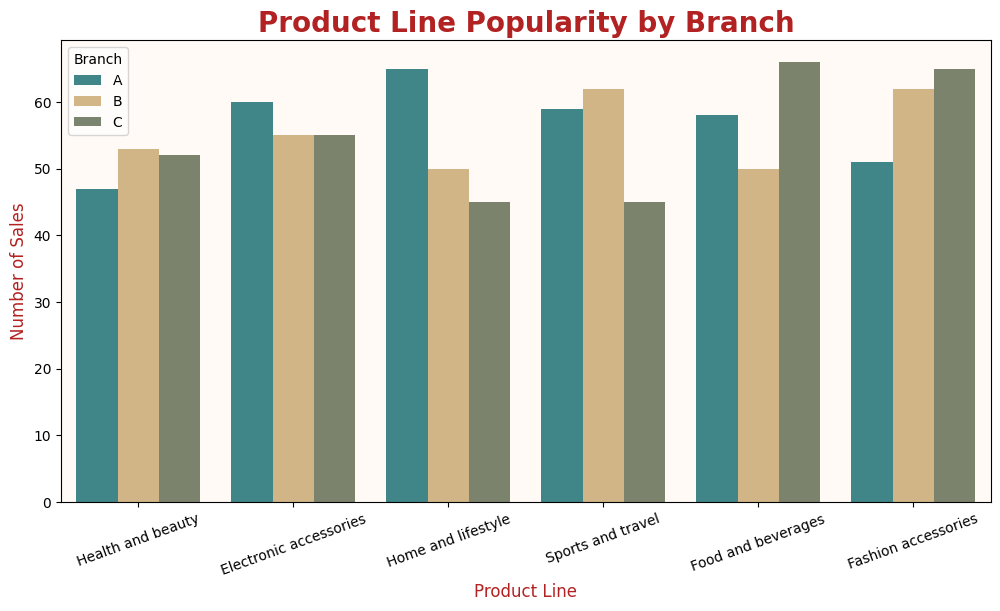

In [385]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Product line", hue="Branch", data=df, palette=["#00777C", "#D6A85C", "#5A6A47"], alpha=0.8)
plt.title("Product Line Popularity by Branch", fontsize=20, fontweight="bold", color="#B22222")
plt.xlabel("Product Line", fontsize=12, color="#B22222")
plt.ylabel("Number of Sales", fontsize=12, color="#B22222")
plt.gca().set_facecolor("#FFFAF5")
plt.xticks(rotation=20)
plt.legend(title="Branch")
plt.show()


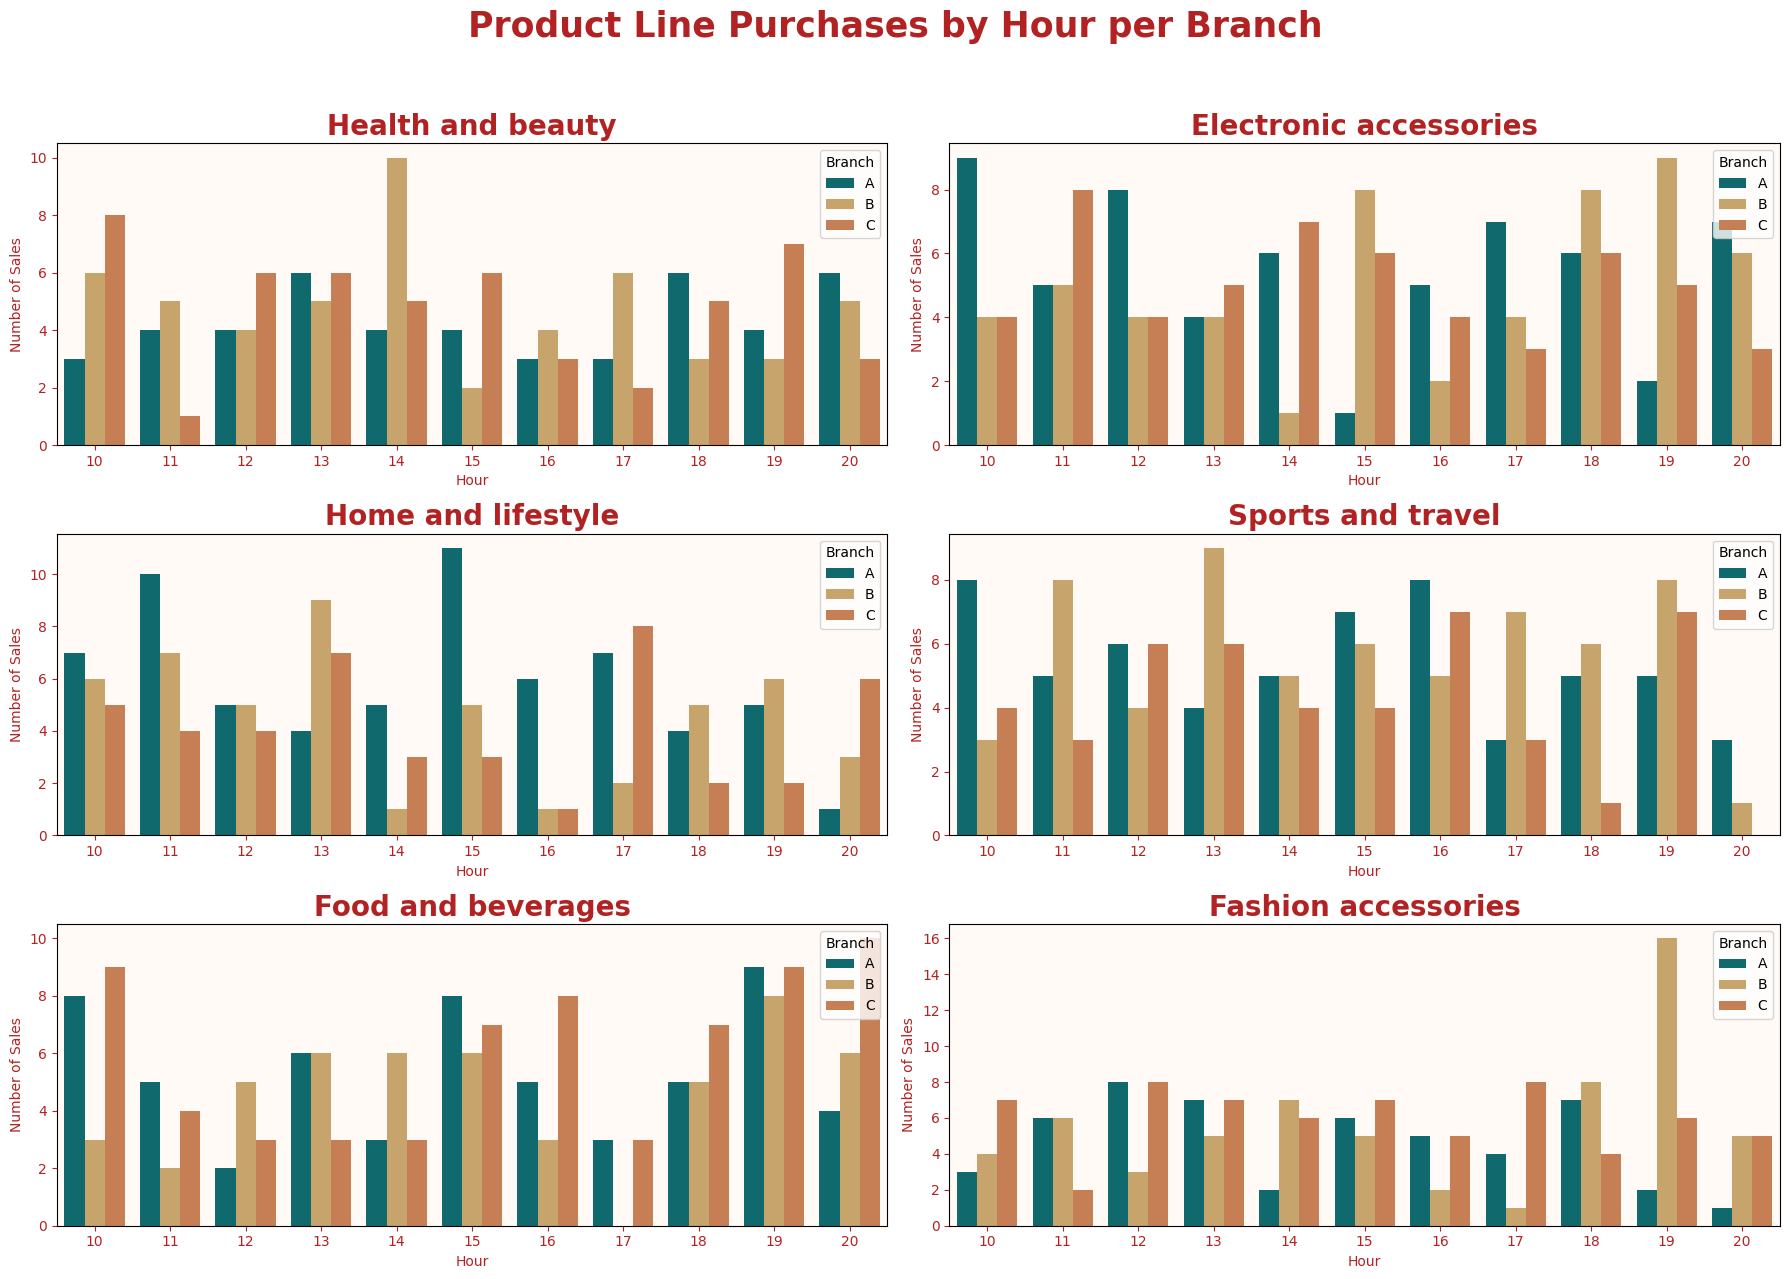

In [386]:
# Breaking down the data by the hour
grouped = df.groupby(["Product line", "Hour", "Branch"], observed=False).size().reset_index(name="Count")
branch_palette = {"A": "#00777C", "B": "#D6A85C", "C": "#D97941"}


product_lines = df["Product line"].unique()
fig, axes = plt.subplots(3, 2, figsize=(18, 13))  
axes = axes.flatten()

for i, product in enumerate(product_lines):
    ax = axes[i]
    product_data = grouped[grouped["Product line"] == product]
    sns.barplot(
        data=product_data, x="Hour", y="Count", hue="Branch",
        palette=branch_palette, ax=ax
    )
    ax.set_title(product, fontsize=20, fontweight="bold", color="#B22222")
    ax.set_xlabel("Hour", fontsize=10, color="#B22222")
    ax.set_ylabel("Number of Sales", fontsize=10, color="#B22222")
    ax.set_facecolor("#FFFAF5")
    ax.tick_params(colors="#B22222")
    ax.legend(title="Branch")

plt.suptitle("Product Line Purchases by Hour per Branch", fontsize=25, fontweight="bold", color="#B22222")
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


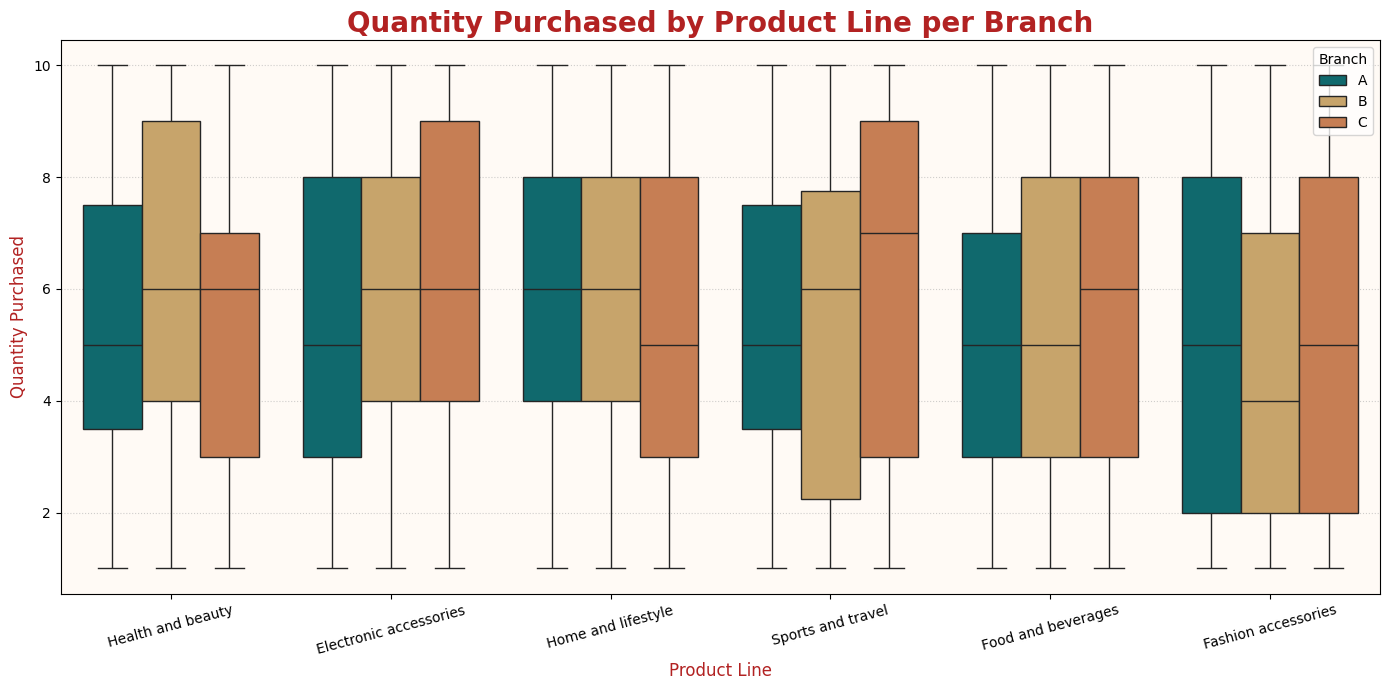

In [387]:
# Looking at the quantities purchased by product line to determine if certain products are purchased in bulk
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df,
    x="Product line", y="Quantity", hue="Branch",
    palette=branch_palette
)

plt.title("Quantity Purchased by Product Line per Branch", fontsize=20, fontweight="bold", color="#B22222")
plt.xlabel("Product Line", fontsize=12, color="#B22222")
plt.ylabel("Quantity Purchased", fontsize=12, color="#B22222")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="dotted", alpha=0.6)
plt.gca().set_facecolor("#FFFAF5")
plt.legend(title="Branch", loc="upper right")
plt.tight_layout()
plt.show()


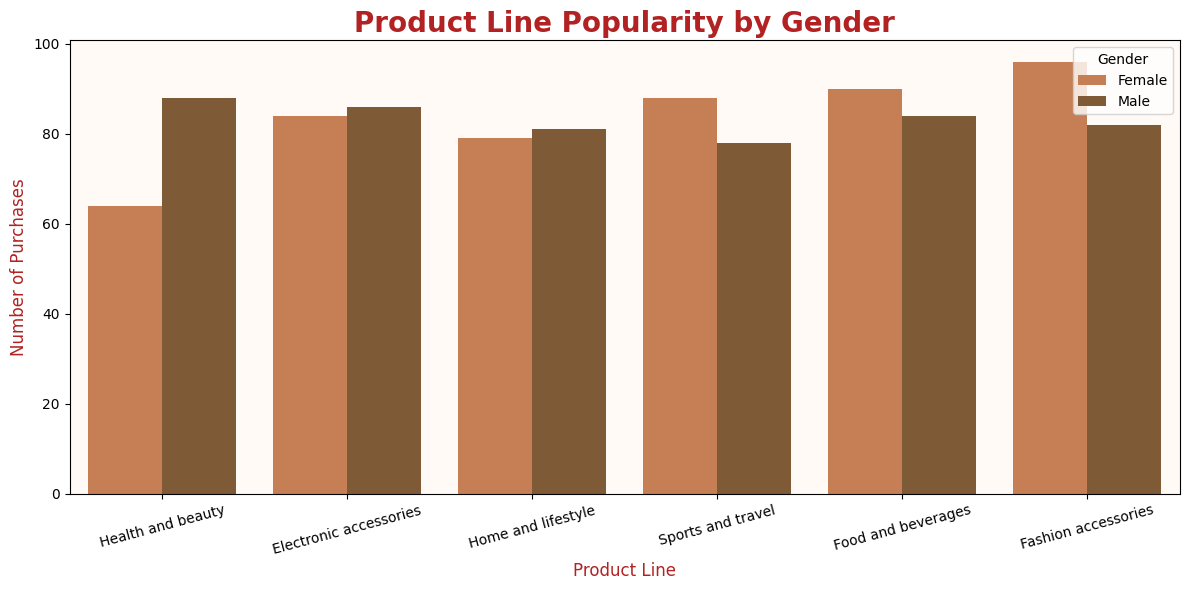

In [388]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x="Product line", hue="Gender",
    palette=["#D97941", "#8B5A2B"]
)

plt.title("Product Line Popularity by Gender", fontsize=20, fontweight="bold", color="#B22222")
plt.xlabel("Product Line", fontsize=12, color="#B22222")
plt.ylabel("Number of Purchases", fontsize=12, color="#B22222")
plt.xticks(rotation=15)
plt.gca().set_facecolor("#FFFAF5")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


#### Ratings by Product Line and Branch

Here we look for additional factors (other than the product itself) that might contribute to ratings.

In [390]:
# Average ratings
overall_avg_rating = df["Rating"].mean().round(2)
avg_rating_by_branch = df.groupby("Branch", observed=False)["Rating"].mean().round(2)
avg_rating_product_branch = df.groupby(["Branch", "Product line"], observed=False)["Rating"].mean().unstack().round(2)

print('Overall Rating Average')
display(overall_avg_rating)
print('\n\nAverage Rating by Branch')
display(avg_rating_by_branch)
print('\n\nAverage Rating by Product Line per Branch')
display(avg_rating_product_branch)

Overall Rating Average


6.97



Average Rating by Branch


Branch
A    7.03
B    6.82
C    7.07
Name: Rating, dtype: float64



Average Rating by Product Line per Branch


Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,6.91,6.88,7.25,6.9,6.93,7.26
B,7.12,6.72,6.99,7.1,6.52,6.51
C,6.75,7.44,7.08,7.0,7.06,7.03


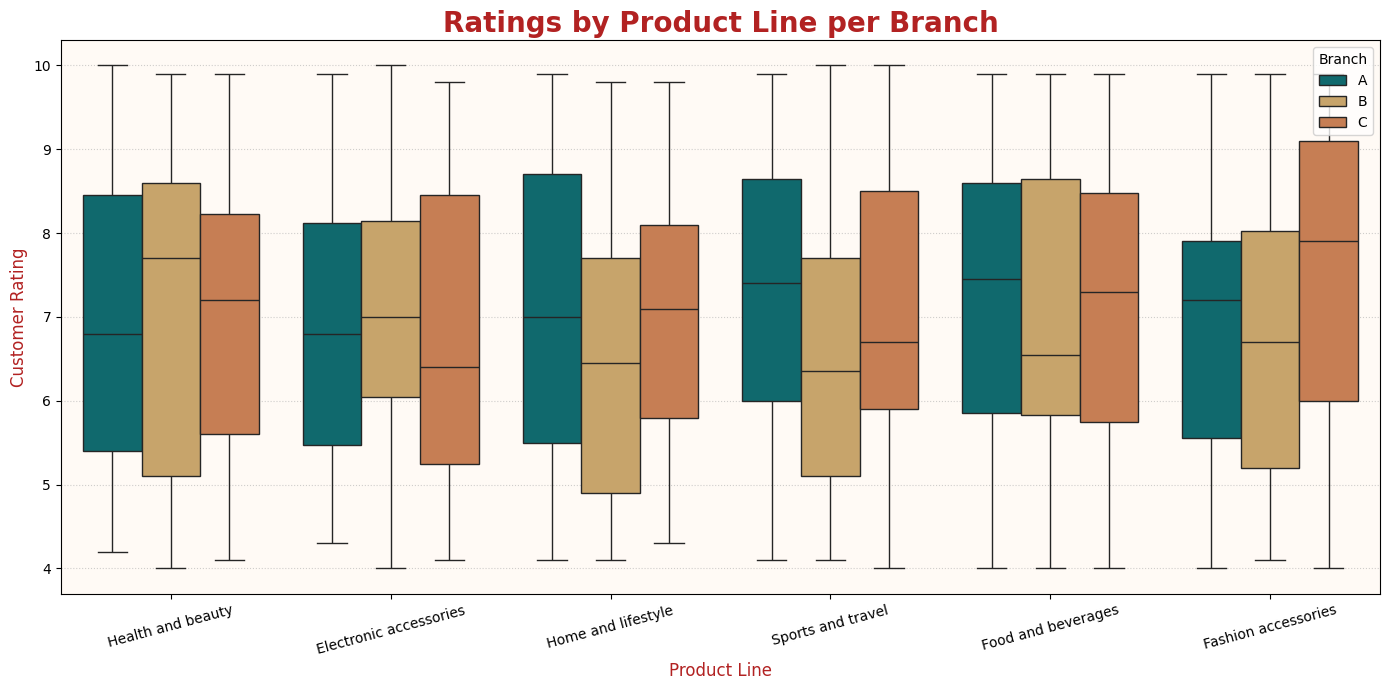

In [391]:
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df,
    x="Product line", y="Rating", hue="Branch",
    palette=branch_palette
)

plt.title("Ratings by Product Line per Branch", fontsize=20, fontweight="bold", color="#B22222")
plt.xlabel("Product Line", fontsize=12, color="#B22222")
plt.ylabel("Customer Rating", fontsize=12, color="#B22222")
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="dotted", alpha=0.6)
plt.gca().set_facecolor("#FFFAF5")
plt.legend(title="Branch", loc="upper right")
plt.tight_layout()
plt.show()


In [412]:
# Renaming column for modeling purposes
df = df.rename(columns={"Product line": "Product_line"})

In [414]:
# Model: Rating ~ Branch + Product Line + Interaction
model = ols('Rating ~ C(Branch) + C(Product_line) + C(Branch):C(Product_line)', data=df).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                sum_sq     df         F    PR(>F)
C(Branch)                    11.718199    2.0  1.989311  0.137341
C(Product_line)               7.475968    5.0  0.507656  0.770630
C(Branch):C(Product_line)    38.579225   10.0  1.309861  0.220065
Residual                   2892.275938  982.0       NaN       NaN


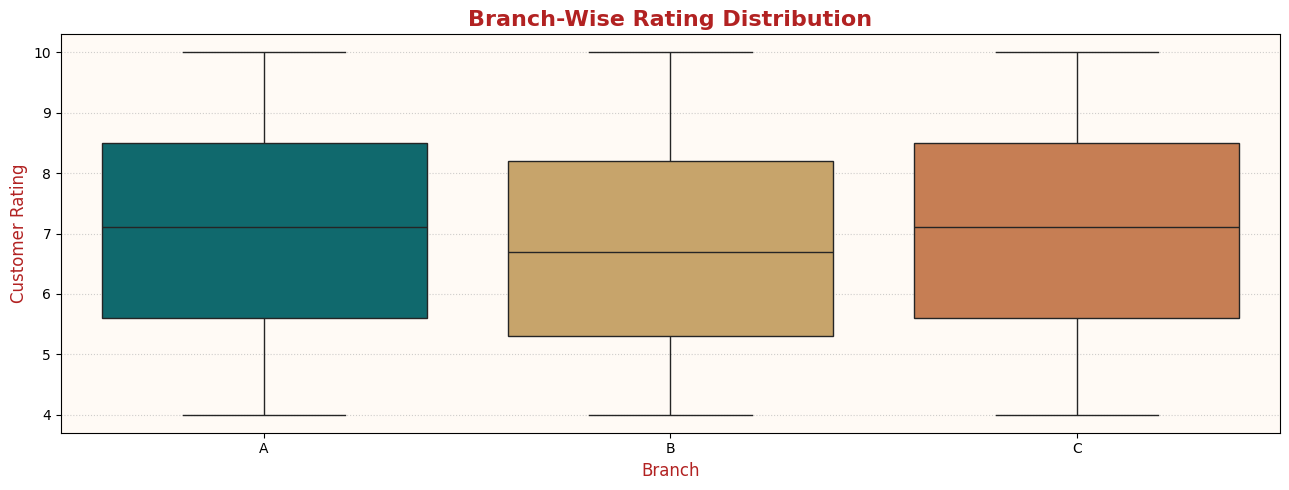

In [394]:

plt.figure(figsize=(13, 5))
sns.boxplot(
    data=df,
    x="Branch", y="Rating",
    palette=branch_palette,
    hue="Branch"
)

plt.title("Branch-Wise Rating Distribution", fontsize=16, fontweight="bold", color="#B22222")
plt.xlabel("Branch", fontsize=12, color="#B22222")
plt.ylabel("Customer Rating", fontsize=12, color="#B22222")
plt.grid(axis="y", linestyle="dotted", alpha=0.6)
plt.gca().set_facecolor("#FFFAF5")
plt.tight_layout()
plt.show()


#### Payment Methods

In [396]:
# Payment methods used
payment_pct_by_branch = df.groupby("Branch", observed=False)["Payment"].value_counts(normalize=True).unstack().round(3) * 100

print('Percentages of Payment Methods Used by Branch')
display(payment_pct_by_branch)

Percentages of Payment Methods Used by Branch


Payment,Cash,Credit card,Ewallet
Branch,,,
A,32.4,30.6,37.1
B,33.1,32.8,34.0
C,37.8,29.9,32.3


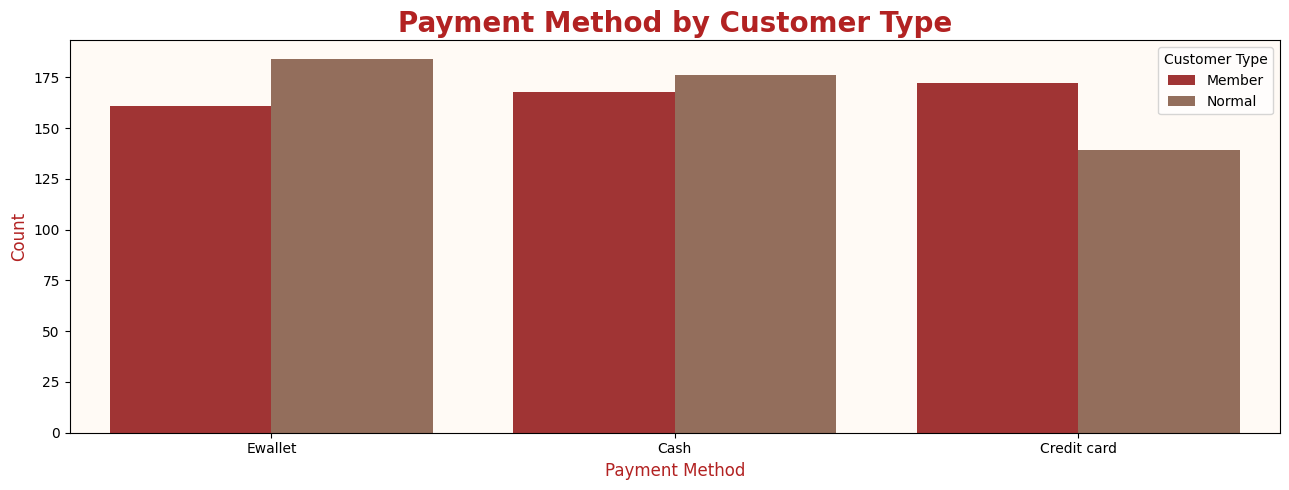

In [397]:
plt.figure(figsize=(13, 5))
sns.countplot(data=df, x="Payment", hue="Customer type", palette=["#B22222", "#9C6B53"])

plt.title("Payment Method by Customer Type", fontsize=20, fontweight="bold", color="#B22222")
plt.xlabel("Payment Method", fontsize=12, color="#B22222")
plt.ylabel("Count", fontsize=12, color="#B22222")
plt.gca().set_facecolor("#FFFAF5")
plt.legend(title="Customer Type")
plt.tight_layout()
plt.show()


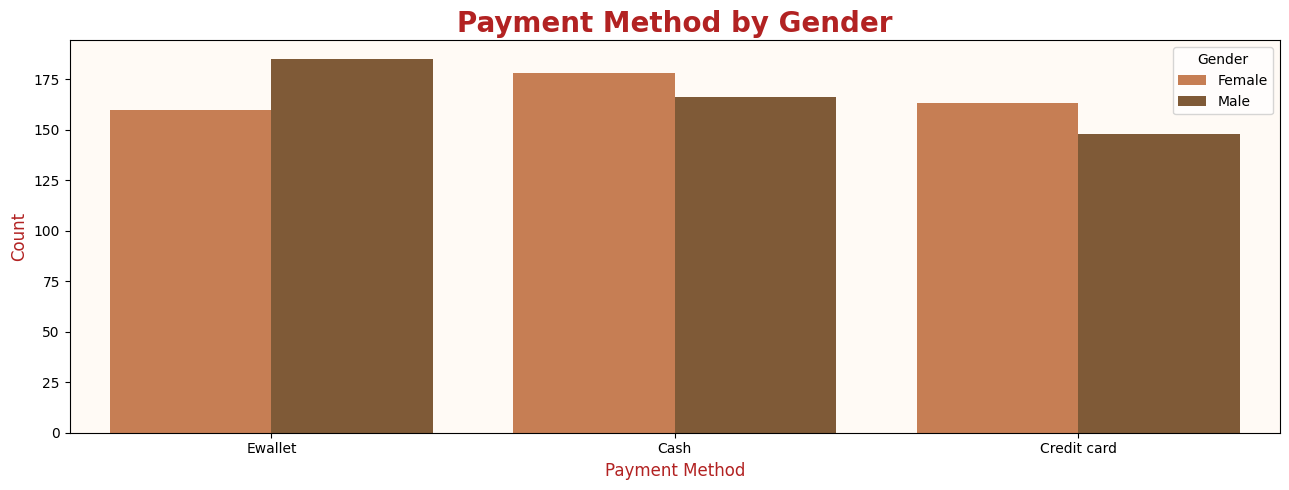

In [398]:
plt.figure(figsize=(13, 5))
sns.countplot(data=df, x="Payment", hue="Gender", palette=["#D97941", "#8B5A2B"])

plt.title("Payment Method by Gender", fontsize=20, fontweight="bold", color="#B22222")
plt.xlabel("Payment Method", fontsize=12, color="#B22222")
plt.ylabel("Count", fontsize=12, color="#B22222")
plt.gca().set_facecolor("#FFFAF5")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


In [399]:
# Customer type distribution by branch
cust_type_by_branch = df.groupby("Branch", observed=False)["Customer type"].value_counts(normalize=True).unstack().round(3) * 100

print('Customer Type Percentages by Branch')
display(cust_type_by_branch)

Customer Type Percentages by Branch


Customer type,Member,Normal
Branch,,
A,49.1,50.9
B,49.7,50.3
C,51.5,48.5


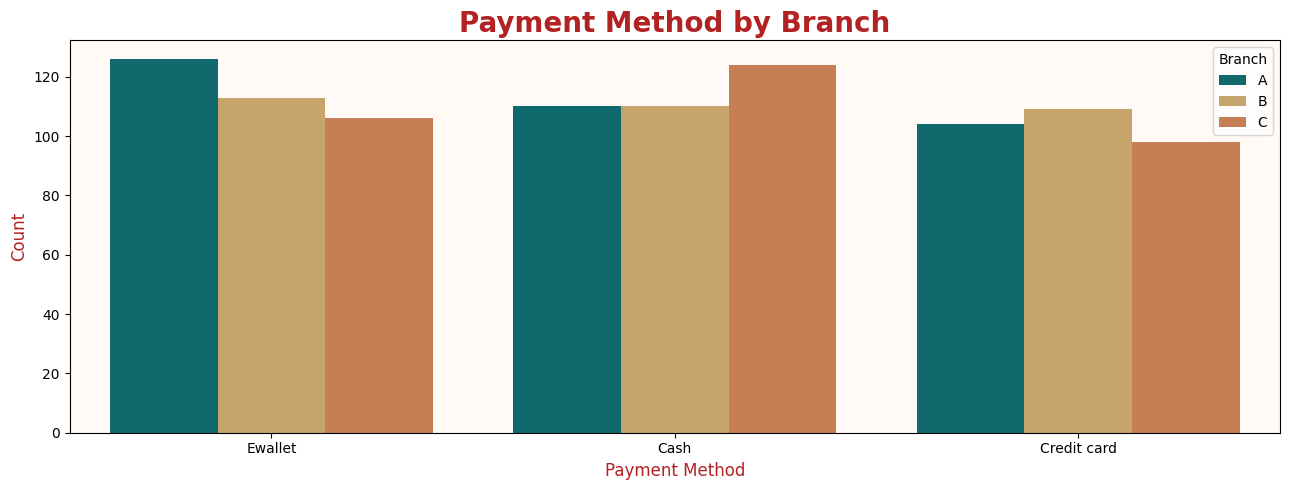

In [400]:
plt.figure(figsize=(13, 5))
sns.countplot(data=df, x="Payment", hue="Branch", palette=branch_palette)

plt.title("Payment Method by Branch", fontsize=20, fontweight="bold", color="#B22222")
plt.xlabel("Payment Method", fontsize=12, color="#B22222")
plt.ylabel("Count", fontsize=12, color="#B22222")
plt.gca().set_facecolor("#FFFAF5")
plt.legend(title="Branch")
plt.tight_layout()
plt.show()


In [401]:
# Grouping total amounts by payment type
ewallet = df[df["Payment"] == "Ewallet"]["Total"]
cash = df[df["Payment"] == "Cash"]["Total"]
credit = df[df["Payment"] == "Credit card"]["Total"]

# ANOVA test
f_stat, p_val = f_oneway(ewallet, cash, credit)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")


F-statistic: 0.0811, p-value: 0.9221


---
# Summary of Key Findings

This exploratory data analysis uncovered meaningful patterns across branch performance, customer behavior, transaction trends, and product-level insights. Here are the key takeaways:

### Branch Performance
* All three branches have comparable total sales and gross income, though Branch C edges out slightly as the most profitable.
* Branch B experiences a dramatic spike in sales on Saturdays, while Branch A maintains more consistent sales throughout the week. Branch C shows stability but dips on Thursdays.
* The average customer rating across all branches is 6.97, with Branch C rated highest (7.07) and Branch B lowest (6.82).


### Customer & Category Trends by Branch

#### Branch A
* **Gender**: 52.6% Male / 47.4% Female
* **Customer Type**: Slight lean toward Normal (50.9%)
* **Top product lines***: Home and Lifestyle (19.1%), Electronic Accessories (17.6%), Sports and Travel (17.4%)
* **Lowest category**: Health and Beauty (13.8%)
* **Preferred payment**: E-wallet (37.1%), followed by Cash (32.4%) and Credit Card (30.6%)
* **Avg Rating**: 7.03
* **Highest-rated categories**: Sports and Travel, Food and Beverage
* **Lowest-rated**: Fashion Accessories (6.88)

#### Branch B
* **Gender**: 51.2% Male / 48.8% Female
* **Customer Type**: Evenly split
* **Top product lines**: Fashion Accessories (18.7%), Sports and Travel (18.7%)
* **Least popular**: Food and Beverage & Home and Lifestyle (15.1%)
* **Payment preferences**: Payment is evenly distributed across all methods (~33% each)
* **Avg Rating**: 6.82
* **Highest-rated categories**: Electronic Accessories (7.12), Health and Beauty (7.1)
* **Lowest-rated**: Sports and Travel (6.51)

#### Branch C
* **Gender**: 54.3% Female / 45.7% Male
* **Customer Type**: Highest share of Member customers (51.5%)
* **Top product lines**: Food and Beverages (20.1%), Fashion Accessories (19.8%)
* **Least popular**: Home and Lifestyle & Sports and Travel (13.7%)
* **Payment preferences**: Cash (37.8%), E-wallet (32.3%), Credit Card (29.9%)
* **Avg Rating**: 7.07
* **Highest-rated category**: Fashion Accessories (7.44)
* **Lowest-rated**: Electronic Accessories (6.75)


### Sales Timing Insights
* Saturday is the busiest day overall (16.4% of all transactions), followed by Tuesday (15.8%). Monday is the slowest (12.5%).
* Branch-specific peak hours vary significantly:
* Branch A is busiest in the late morning and early afternoon
* Branch B sees heavier activity in the evening hours
* Branch C also trends toward afternoon to evening
* Ratings are consistent across branches and product lines. A two-way ANOVA confirmed no statistically significant differences by branch, category, or their interaction.

___
# Final Recommendations 

Based on the data exploration and analysis, the following branch-level and strategy-level recommendations are proposed to improve operations, marketing, and customer experience:

### 1. Optimize Shelf Restocking by Product Line & Time 
Use hourly product demand patterns to guide shelf stocking and replenishment schedules:

* Home and Lifestyle: Prioritize restocking early in the day, especially in Branch A, where demand is strongest and most consistent.
* Food and Beverages: Ensure shelves are stocked before 11 AM in Branches B and C, where sales peak midday.
* Health and Beauty:
  * Restock early in Branch B.
  * Focus on afternoon hours in Branches A and C.
* Fashion Accessories: Demand is steady but not high. Restocking can occur during off-peak hours.
* Sports and Travel / Electronic Accessories: Demand is consistent throughout the day. Restocking can be spread evenly to avoid crowding.

### 2. Tailor Marketing Strategies by Customer Demographics
* Branch C has a higher percentage of female shoppers and members. Consider targeted promotions on fashion and beauty items, loyalty programs, or bundled discounts for members.
* Branch A has more male shoppers and higher ratings in Sports and Travel — lean into this with seasonal promotions or spotlight displays in those categories.

### 3. Promote Frictionless Checkout (E-wallet Incentives)
With no statistical difference in spending across payment types, consider incentivizing e-wallet use with:
  * Loyalty points
  * Faster checkout lines
  * Digital receipts or app-based discounts

This reduces cash handling and may improve operational flow, especially during peak hours.

### 4. Align Staffing with Branch-Specific Peak Hours
Use hourly sales data to schedule breaks, assign floor coverage, and improve customer experience:
  * Branch A needs more staff earlier in the day (10 AM – 2 PM).
  * Branch B should focus staffing on the evening shift (5 PM – 7 PM).
  * Branch C peaks slightly later in the afternoon and should ramp up between 1 PM – 6 PM.

### 5. Use Sales Trends to Inform Promotions
  * Launch weekly promotions or limited-time offers on Tuesdays and Saturdays, the highest sales days across all branches.
  * Consider email/SMS campaigns or in-store announcements that coincide with each branch's peak shopping windows to maximize effectiveness.